In [1]:
import pandas as pd
import numpy as np
import nltk
words = set(nltk.corpus.words.words())
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/6lakh_pipeline_company_companies_data_2021-07-21.csv")

/home/slintel/bert/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.columns

Index(['revenue', 'rank', 'stock_exchange', 'open_requisitions_range',
       'stock_price', 'stock_symbol', '_id', 'company_city', 'company_country',
       'company_state', 'company_crunchbase_page', 'company_description',
       'company_facebook_page', 'company_funding', 'company_industry',
       'company_latest_funding_date', 'company_linkedin_page', 'company_name',
       'company_phone_number', 'company_products_services',
       'company_profile_image_url', 'company_sector', 'company_size',
       'company_twitter_page', 'company_type', 'company_website', 'ebitda',
       'fiscal_year', 'homepage_url', 'job_count', 'tags', 'lead_count',
       'updated_at', 'permalink', 'company_founded_at', 'geo_point',
       'company_continent', 'postal_code', 'company_address', 'sic_code',
       'naics_code', 'created_at', 'cb_id', 'revenue_range', 'flag',
       'nubela_id', 'linkedin_internal_id', 'tagline', 'linkedin_search_id',
       'linkedin_employee_count', 'linkedin_follower_coun

In [4]:
len(data)

596769

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596769 entries, 0 to 596768
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   revenue                      7122 non-null    float64
 1   rank                         596727 non-null  float64
 2   stock_exchange               3580 non-null    object 
 3   open_requisitions_range      2975 non-null    object 
 4   stock_price                  240 non-null     object 
 5   stock_symbol                 3580 non-null    object 
 6   _id                          596769 non-null  object 
 7   company_city                 578835 non-null  object 
 8   company_country              584001 non-null  object 
 9   company_state                576327 non-null  object 
 10  company_crunchbase_page      596725 non-null  object 
 11  company_description          585547 non-null  object 
 12  company_facebook_page        391896 non-null  object 
 13 

In [6]:
keep = []
for i in data.columns:
    non_null_count = data[i].notnull().sum()
    if(non_null_count>=0.7*len(data)):
        keep.append(i)
keep

['rank',
 '_id',
 'company_city',
 'company_country',
 'company_state',
 'company_crunchbase_page',
 'company_description',
 'company_funding',
 'company_industry',
 'company_latest_funding_date',
 'company_linkedin_page',
 'company_name',
 'company_phone_number',
 'company_profile_image_url',
 'company_sector',
 'company_size',
 'company_type',
 'company_website',
 'homepage_url',
 'job_count',
 'lead_count',
 'updated_at',
 'permalink',
 'company_founded_at',
 'company_continent',
 'company_address',
 'created_at',
 'cb_id',
 'revenue_range',
 'nubela_id',
 'linkedin_internal_id',
 'linkedin_search_id',
 'linkedin_employee_count',
 'partition_0']

In [7]:
keep = []
for i in data.columns:
    non_null_count = data[i].notnull().sum()
    if(non_null_count>=0.7*len(data)):
        keep.append(i)
len(keep)

34

In [8]:
keep2 = []
for i in data.columns:
    non_null_count = data[i].notnull().sum()
    if(non_null_count>=0.5*len(data)):
        keep2.append(i)
len(keep2)
# (set(keep2)-set(keep))

39

In [9]:
len(keep2),len(keep)

(39, 34)

In [10]:
for i in keep2:
    if i not in keep:
        print(i)

company_facebook_page
company_products_services
company_twitter_page
postal_code
linkedin_follower_count


In [11]:
keep

['rank',
 '_id',
 'company_city',
 'company_country',
 'company_state',
 'company_crunchbase_page',
 'company_description',
 'company_funding',
 'company_industry',
 'company_latest_funding_date',
 'company_linkedin_page',
 'company_name',
 'company_phone_number',
 'company_profile_image_url',
 'company_sector',
 'company_size',
 'company_type',
 'company_website',
 'homepage_url',
 'job_count',
 'lead_count',
 'updated_at',
 'permalink',
 'company_founded_at',
 'company_continent',
 'company_address',
 'created_at',
 'cb_id',
 'revenue_range',
 'nubela_id',
 'linkedin_internal_id',
 'linkedin_search_id',
 'linkedin_employee_count',
 'partition_0']

In [12]:
df = data[keep]

In [13]:
df2=df.drop(columns=['company_crunchbase_page','company_address','created_at','cb_id','nubela_id',
                 'linkedin_internal_id','linkedin_search_id','company_linkedin_page','company_phone_number',
                    'company_profile_image_url','homepage_url'])

In [14]:
df2.columns

Index(['rank', '_id', 'company_city', 'company_country', 'company_state',
       'company_description', 'company_funding', 'company_industry',
       'company_latest_funding_date', 'company_name', 'company_sector',
       'company_size', 'company_type', 'company_website', 'job_count',
       'lead_count', 'updated_at', 'permalink', 'company_founded_at',
       'company_continent', 'revenue_range', 'linkedin_employee_count',
       'partition_0'],
      dtype='object')

In [15]:
to_drop = ['updated_at', 'permalink','partition_0','company_website','rank']

In [16]:
df2=df2.drop(columns=to_drop)
df2

,_id,company_city,company_country,company_state,company_description,company_funding,company_industry,company_latest_funding_date,company_name,company_sector,company_size,company_type,job_count,lead_count,company_founded_at,company_continent,revenue_range,linkedin_employee_count
0,5b073192599b311ccc11b101,San Francisco,United States,California,ProLeads is The Holy Grail of Account Based Pr...,75000.0,Information Technology and Services,1.483661e+09,ProLeads io,Technology,1-10,Private,0,1,2012.0,North America,Unknown,2.0
1,5b0737d1599b311ccc11c3f4,Madrid,Spain,Madrid,cramway | The collaborative e-learning\n\ncram...,NaN,E-Learning,NaN,cramway,Technology,1-10,Private,0,0,2013.0,Europe,Unknown,1.0
2,5b073905599b311ccc11c792,Sion,Switzerland,Valais,Imperix is a Swiss company developing high-end...,NaN,Electrical/Electronic Manufacturing,NaN,imperix,Industrials & Chemicals,11-50,Private,0,8,2013.0,Europe,Unknown,9.0
3,5b073d93599b311ccc11d524,Seoul,Korea Republic of,Seoul-t'ukpyolsi,Yonhap Infomax is a financial news and data pr...,0.0,Information Services,0.000000e+00,Yonhap Infomax,Technology,51-200,Private,0,128,NaN,Asia,100M-500M,72.0
4,5b07485b599b311ccc11f4af,New York,United States,New York,Saffron Fix is the ONLY Indian meal-kit delive...,0.0,Food & Beverages,0.000000e+00,Saffron Fix,Retail and CPG,1-10,NaN,0,0,2014.0,North America,1M-10M,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596764,5ba8a5d37c8666394377bf49,Simsbury,United States,Connecticut,The former professionals of Saslow Lufkin & Bu...,NaN,Accounting,NaN,Saslow Lufkin & Buggy Llp,Financial Services,51-200,NaN,0,11,1999.0,North America,Unknown,NaN
596765,5ba8a5d37c8666394377bf56,Houston,United States,Texas,Samuel L. Bryant Investments has over 5 decade...,0.0,Real Estate,0.000000e+00,Samuel L. Bryant Investments,Professional Services,1-10,Partnership,0,2,NaN,North America,Unknown,4.0
596766,5ba8a5d37c8666394377bf68,Leeds,United Kingdom,Leeds,Deliberately disruptive and culturally connect...,NaN,Public Relations and Communications,NaN,SLBPR,Professional Services,1-10,Private,0,10,NaN,Europe,1M-10M,6.0
596767,5ba8a5d37c8666394377bf9d,Dongying,China,Shandong,Shandong Polymer Biochemicals is a biotechnolo...,NaN,Biotechnology,NaN,"Shandong Polymer Biochemicals Co., Ltd",Healthcare and Lifesciences,1-10,Public,0,1,NaN,Asia,Unknown,17.0


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596769 entries, 0 to 596768
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   _id                          596769 non-null  object 
 1   company_city                 578835 non-null  object 
 2   company_country              584001 non-null  object 
 3   company_state                576327 non-null  object 
 4   company_description          585547 non-null  object 
 5   company_funding              455494 non-null  float64
 6   company_industry             596769 non-null  object 
 7   company_latest_funding_date  454185 non-null  float64
 8   company_name                 596766 non-null  object 
 9   company_sector               596769 non-null  object 
 10  company_size                 575797 non-null  object 
 11  company_type                 501853 non-null  object 
 12  job_count                    596769 non-null  int64  
 13 

In [18]:
df2.isnull().mean() * 100

_id                             0.000000
company_city                    3.005183
company_country                 2.139521
company_state                   3.425446
company_description             1.880460
company_funding                23.673314
company_industry                0.000000
company_latest_funding_date    23.892662
company_name                    0.000503
company_sector                  0.000000
company_size                    3.514258
company_type                   15.904982
job_count                       0.000000
lead_count                      0.000000
company_founded_at             18.371598
company_continent               2.139521
revenue_range                   0.000000
linkedin_employee_count        15.684293
dtype: float64

In [19]:
df2.company_sector.unique()

array(['Technology', 'Industrials & Chemicals', 'Retail and CPG',
       'Professional Services', 'Healthcare and Lifesciences',
       'Financial Services', 'Media and Telecom', 'Energy and Utilities'],
      dtype=object)

In [20]:
df2.company_industry.unique()

array(['Information Technology and Services', 'E-Learning',
       'Electrical/Electronic Manufacturing', 'Information Services',
       'Food & Beverages', 'Internet', 'Education Management',
       'Public Relations and Communications', 'Marketing and Advertising',
       'Higher Education', 'Supermarkets',
       'Professional Training & Coaching', 'Hospital & Health Care',
       'Sporting Goods', 'Hospitality', 'Investment Banking',
       'Staffing and Recruiting', 'Insurance', 'Research',
       'Biotechnology', 'Computer Software', 'Public Policy',
       'Leisure Travel & Tourism', 'Health Wellness and Fitness',
       'Computer Games', 'Entertainment', 'Apparel & Fashion',
       'Medical Devices', 'Consumer Services',
       'Venture Capital & Private Equity', 'Online Media',
       'Business Supplies and Equipment', 'Retail', 'Real Estate',
       'Government Administration', 'Building Materials',
       'Investment Management', 'Defense & Space', 'Wireless',
       'Comput

In [21]:
print(len(df2),"\nAfter Drop:")
df3 = df2.dropna(axis=0, subset=['company_description','company_industry','company_sector'])
df3.reset_index(inplace=True,drop=True)
print(len(df3))

596769 
After Drop:
585547


In [22]:
data = df3[['company_description','company_industry','company_sector']] #for TEXT ONLY

In [23]:
data

,company_description,company_industry,company_sector
0,ProLeads is The Holy Grail of Account Based Pr...,Information Technology and Services,Technology
1,cramway | The collaborative e-learning\n\ncram...,E-Learning,Technology
2,Imperix is a Swiss company developing high-end...,Electrical/Electronic Manufacturing,Industrials & Chemicals
3,Yonhap Infomax is a financial news and data pr...,Information Services,Technology
4,Saffron Fix is the ONLY Indian meal-kit delive...,Food & Beverages,Retail and CPG
...,...,...,...
585542,The former professionals of Saslow Lufkin & Bu...,Accounting,Financial Services
585543,Samuel L. Bryant Investments has over 5 decade...,Real Estate,Professional Services
585544,Deliberately disruptive and culturally connect...,Public Relations and Communications,Professional Services
585545,Shandong Polymer Biochemicals is a biotechnolo...,Biotechnology,Healthcare and Lifesciences


In [34]:
def get_non_Eng(data):
    fin_data=pd.DataFrame()
    spa_data=pd.DataFrame()
    for i in tqdm(data.index):
        ini_len = len(data['company_description'][i])
        
        sen = " ".join(w for w in nltk.wordpunct_tokenize(data['company_description'][i]) if w.lower() in words or not w.isalpha())

        fin_len=len(sen)
        if(fin_len>= 0.5*ini_len):
            fin_data=fin_data.append(data.iloc[i])
        else:
            spa_data=spa_data.append(data.iloc[i])
    fin_data.reset_index(inplace=True,drop=True)
    spa_data.reset_index(inplace=True,drop=True)

    return fin_data,spa_data

In [35]:
engdf,nonedf=get_non_Eng(data)

100%|██████████| 585547/585547 [2:13:48<00:00, 72.93it/s]  


In [36]:
nonedf

,company_description,company_industry,company_sector
0,HØGSKOLEN STORD/HAUGESUND is an internet compa...,Internet,Technology
1,sMoneybox - domácí účetnictví zdarma\n\nsMoney...,Financial Services,Financial Services
2,"Berg-Hansen ble etablert i 1875, og eies i dag...",Leisure Travel & Tourism,Professional Services
3,Vil du jobbe med Kremen av iskrem?\nNoen morge...,Food & Beverages,Retail and CPG
4,Maske Gruppen AS er en av landets ledende gros...,Wholesale,Retail and CPG
...,...,...,...
60689,Groothandel in refurbished laptops en laptopon...,Computer Hardware,Technology
60690,Skywell LLC – международная ІТ-компания с офис...,Information Technology and Services,Technology
60691,Brokering fine wines to cruise lines and air l...,Wine and Spirits,Retail and CPG
60692,"SPECIALISTEN IN INTERNET MARKETING, WEBDESIGN,...",Internet,Technology


In [39]:
nonedf.to_excel("../data/nonEng_split.xlsx")

In [ ]:
engdf.to_excel("../data/Eng_split.xlsx", engine='xlsxwriter')

In [46]:
engdf.to_csv("../data/Eng_split.csv",encoding='utf8')

In [5]:
df = pd.read_csv("../data/6lakh_pipeline_company_companies_data_2021-07-21.csv")

df=df[['_id','company_description']]

pd.merge(df, data, on="company_description")

/home/slintel/bert/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Language check using spacy

In [47]:
from spacy_langdetect import LanguageDetector
import spacy
nlp = spacy.load('en_core_web_sm')  # 1
nlp.add_pipe('language_detector', last=True) #2
text_content = "My name mohit in Berlin."
doc = nlp(text_content) #3
detect_language = doc._.language #4
print(detect_language)

noneng=pd.read_excel("../data/nonEng_split.xlsx")

count=0
for i in tqdm(noneng.index):
    text_content = noneng['company_description'][i]
    doc = nlp(text_content) #3
    detect_language = doc._.language #4
    if('en'==detect_language['language']):
        count+=1

def get_lang(x):
    text_content = x
    doc = nlp(text_content) #3
    detect_language = doc._.language #4
    return detect_language['language']

tqdm.pandas()

noneng['language']=noneng.progress_apply(lambda i: get_lang(i['company_description']),axis=1)

noneng.columns

noneng

{'language': 'en', 'score': 0.9999952866913357}


In [60]:
noneng.loc['en'==noneng['language']]

,Unnamed: 0,company_description,company_industry,company_sector,language
0,0,HØGSKOLEN STORD/HAUGESUND is an internet compa...,Internet,Technology,en
5,5,3B Fiberglass developer and supplier of fibreg...,Glass Ceramics & Concrete,Industrials & Chemicals,en
6,6,Neville Clarke is a consultancy and training o...,Management Consulting,Professional Services,en
11,11,Kapa Biosystems offers next generation sequenc...,Biotechnology,Healthcare and Lifesciences,en
21,21,IT services,Information Technology and Services,Technology,en
...,...,...,...,...,...
60647,60647,SmarterCircle is a marketing company which dev...,Internet,Technology,en
60656,60656,Skills in Healthcare is a pharmaceuticals comp...,Pharmaceuticals,Healthcare and Lifesciences,en
60674,60674,Sky Network is a Telecommunications company lo...,Telecommunications,Media and Telecom,en
60684,60684,SKYNICHE is an Indian multinational corporatio...,Information Technology and Services,Technology,en


### Spacy language checker was slower, compared to keeping english words from NLTK and checking final length, so proceeding with initially filtered data

In [98]:
data=pd.read_csv("../data/Eng_split.csv")
to_add = noneng.loc['en'==noneng['language']].drop('language',axis=1) #adding sentences from non eng data,which spacy 
# classified as en language

data = pd.concat([data,to_add])
# data = data.drop('Unnamed: 0',axis=1)

data.columns

Index(['company_description', 'company_industry', 'company_sector'], dtype='object')

In [99]:
df = pd.read_csv("../data/6lakh_pipeline_company_companies_data_2021-07-21.csv")

df=df[['_id','company_description', 'company_industry', 'company_sector']]

data=pd.merge(df, data, on=['company_description', 'company_industry', 'company_sector'],how='inner')

data.reset_index(inplace=True,drop=True)

In [126]:
data.to_csv("../data/Final_data.csv")

In [127]:
data['company_sector'].value_counts()

Professional Services          5986
Technology                     5553
Financial Services             1952
Retail and CPG                 1857
Industrials & Chemicals        1703
Healthcare and Lifesciences    1282
Media and Telecom              1169
Energy and Utilities            499
Name: company_sector, dtype: int64

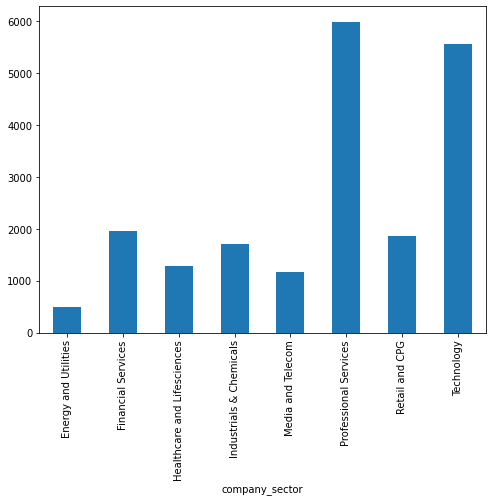

In [129]:
fig = plt.figure(figsize=(8,6))
data.groupby('company_sector').company_description.count().plot.bar()
plt.show()

In [2]:
# data=pd.read_csv("../data/Eng_split.csv") ##
# data=data.loc[:10000]
# df=data.loc[:10000]

In [19]:
data=pd.read_csv("../data/Eng_split.csv") ##

In [20]:
data

,company_description,company_industry,company_sector
0,ProLeads is The Holy Grail of Account Based Pr...,Information Technology and Services,Technology
1,cramway | The collaborative e-learning\n\ncram...,E-Learning,Technology
2,Imperix is a Swiss company developing high-end...,Electrical/Electronic Manufacturing,Industrials & Chemicals
3,Yonhap Infomax is a financial news and data pr...,Information Services,Technology
4,Saffron Fix is the ONLY Indian meal-kit delive...,Food & Beverages,Retail and CPG
...,...,...,...
524848,The former professionals of Saslow Lufkin & Bu...,Accounting,Financial Services
524849,Samuel L. Bryant Investments has over 5 decade...,Real Estate,Professional Services
524850,Deliberately disruptive and culturally connect...,Public Relations and Communications,Professional Services
524851,Shandong Polymer Biochemicals is a biotechnolo...,Biotechnology,Healthcare and Lifesciences


In [21]:
df = pd.read_csv("../data/6lakh_pipeline_company_companies_data_2021-07-21.csv")

df=df[['_id','company_description', 'company_industry', 'company_sector']]

data=pd.merge(df, data, on=['company_description', 'company_industry', 'company_sector'],how='inner')

data.reset_index(inplace=True,drop=True)

/home/slintel/bert/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Inital dataset had:596k,
### After Dropping null entries:585k,
### Then filtering Non eng sentences which leads to: 525k 

In [3]:
data=pd.read_csv("../data/Eng_split_with_id.csv") ##
data=data[['_id','company_description','company_industry','company_sector']]

In [4]:
data

,_id,company_description,company_industry,company_sector
0,5b073192599b311ccc11b101,ProLeads is The Holy Grail of Account Based Pr...,Information Technology and Services,Technology
1,5b0737d1599b311ccc11c3f4,cramway | The collaborative e-learning\n\ncram...,E-Learning,Technology
2,5b073905599b311ccc11c792,Imperix is a Swiss company developing high-end...,Electrical/Electronic Manufacturing,Industrials & Chemicals
3,5b073d93599b311ccc11d524,Yonhap Infomax is a financial news and data pr...,Information Services,Technology
4,5b07485b599b311ccc11f4af,Saffron Fix is the ONLY Indian meal-kit delive...,Food & Beverages,Retail and CPG
...,...,...,...,...
525530,5ba8a5d37c8666394377bf49,The former professionals of Saslow Lufkin & Bu...,Accounting,Financial Services
525531,5ba8a5d37c8666394377bf56,Samuel L. Bryant Investments has over 5 decade...,Real Estate,Professional Services
525532,5ba8a5d37c8666394377bf68,Deliberately disruptive and culturally connect...,Public Relations and Communications,Professional Services
525533,5ba8a5d37c8666394377bf9d,Shandong Polymer Biochemicals is a biotechnolo...,Biotechnology,Healthcare and Lifesciences


In [5]:
import re
import nltk.corpus
from nltk.corpus import stopwords

def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return df

In [7]:
data_clean = clean_text(data, 'company_description', 'text_clean')
stop = stopwords.words('english')
data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

,_id,company_description,company_industry,company_sector,text_clean
0,5b073192599b311ccc11b101,ProLeads is The Holy Grail of Account Based Pr...,Information Technology and Services,Technology,proleads holy grail account based prospect dev...
1,5b0737d1599b311ccc11c3f4,cramway | The collaborative e-learning\n\ncram...,E-Learning,Technology,cramway collaborative elearningcramway collabo...
2,5b073905599b311ccc11c792,Imperix is a Swiss company developing high-end...,Electrical/Electronic Manufacturing,Industrials & Chemicals,imperix swiss company developing highend contr...
3,5b073d93599b311ccc11d524,Yonhap Infomax is a financial news and data pr...,Information Services,Technology,yonhap infomax financial news data providing c...
4,5b07485b599b311ccc11f4af,Saffron Fix is the ONLY Indian meal-kit delive...,Food & Beverages,Retail and CPG,saffron fix indian mealkit delivery service us...


In [52]:
import nltk 
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_clean'].apply(lambda x: word_tokenize(x))
data_clean.head()

[nltk_data] Downloading package punkt to /home/slintel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,_id,company_description,company_industry,company_sector,text_clean,text_tokens
0,5b073192599b311ccc11b101,proleads holy grail account based prospect dev...,Information Technology and Services,Technology,proleads holy grail account based prospect dev...,"[proleads, holy, grail, account, based, prospe..."
1,5b0737d1599b311ccc11c3f4,cramway collaborative elearningcramway collabo...,E-Learning,Technology,cramway collaborative elearningcramway collabo...,"[cramway, collaborative, elearningcramway, col..."
2,5b073905599b311ccc11c792,imperix swiss company developing highend contr...,Electrical/Electronic Manufacturing,Industrials & Chemicals,imperix swiss company developing highend contr...,"[imperix, swiss, company, developing, highend,..."
3,5b073d93599b311ccc11d524,yonhap infomax financial news data providing c...,Information Services,Technology,yonhap infomax financial news data providing c...,"[yonhap, infomax, financial, news, data, provi..."
4,5b07485b599b311ccc11f4af,saffron fix indian mealkit delivery service us...,Food & Beverages,Retail and CPG,saffron fix indian mealkit delivery service us...,"[saffron, fix, indian, mealkit, delivery, serv..."


In [53]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text
data_clean['text_tokens_stem'] = data_clean['text_tokens'].apply(lambda x: word_stemmer(x))
data_clean.head()

,_id,company_description,company_industry,company_sector,text_clean,text_tokens,text_tokens_stem
0,5b073192599b311ccc11b101,proleads holy grail account based prospect dev...,Information Technology and Services,Technology,proleads holy grail account based prospect dev...,"[proleads, holy, grail, account, based, prospe...","[prolead, holi, grail, account, base, prospect..."
1,5b0737d1599b311ccc11c3f4,cramway collaborative elearningcramway collabo...,E-Learning,Technology,cramway collaborative elearningcramway collabo...,"[cramway, collaborative, elearningcramway, col...","[cramway, collabor, elearningcramway, collabor..."
2,5b073905599b311ccc11c792,imperix swiss company developing highend contr...,Electrical/Electronic Manufacturing,Industrials & Chemicals,imperix swiss company developing highend contr...,"[imperix, swiss, company, developing, highend,...","[imperix, swiss, compani, develop, highend, co..."
3,5b073d93599b311ccc11d524,yonhap infomax financial news data providing c...,Information Services,Technology,yonhap infomax financial news data providing c...,"[yonhap, infomax, financial, news, data, provi...","[yonhap, infomax, financi, news, data, provid,..."
4,5b07485b599b311ccc11f4af,saffron fix indian mealkit delivery service us...,Food & Beverages,Retail and CPG,saffron fix indian mealkit delivery service us...,"[saffron, fix, indian, mealkit, delivery, serv...","[saffron, fix, indian, mealkit, deliveri, serv..."


In [54]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
data_clean['text_tokens_lemma'] = data_clean['text_tokens'].apply(lambda x: word_lemmatizer(x))
data_clean.head()

[nltk_data] Downloading package wordnet to /home/slintel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,_id,company_description,company_industry,company_sector,text_clean,text_tokens,text_tokens_stem,text_tokens_lemma
0,5b073192599b311ccc11b101,proleads holy grail account based prospect dev...,Information Technology and Services,Technology,proleads holy grail account based prospect dev...,"[proleads, holy, grail, account, based, prospe...","[prolead, holi, grail, account, base, prospect...","[proleads, holy, grail, account, based, prospe..."
1,5b0737d1599b311ccc11c3f4,cramway collaborative elearningcramway collabo...,E-Learning,Technology,cramway collaborative elearningcramway collabo...,"[cramway, collaborative, elearningcramway, col...","[cramway, collabor, elearningcramway, collabor...","[cramway, collaborative, elearningcramway, col..."
2,5b073905599b311ccc11c792,imperix swiss company developing highend contr...,Electrical/Electronic Manufacturing,Industrials & Chemicals,imperix swiss company developing highend contr...,"[imperix, swiss, company, developing, highend,...","[imperix, swiss, compani, develop, highend, co...","[imperix, swiss, company, developing, highend,..."
3,5b073d93599b311ccc11d524,yonhap infomax financial news data providing c...,Information Services,Technology,yonhap infomax financial news data providing c...,"[yonhap, infomax, financial, news, data, provi...","[yonhap, infomax, financi, news, data, provid,...","[yonhap, infomax, financial, news, data, provi..."
4,5b07485b599b311ccc11f4af,saffron fix indian mealkit delivery service us...,Food & Beverages,Retail and CPG,saffron fix indian mealkit delivery service us...,"[saffron, fix, indian, mealkit, delivery, serv...","[saffron, fix, indian, mealkit, deliveri, serv...","[saffron, fix, indian, mealkit, delivery, serv..."


In [8]:
data_clean['company_description']=data_clean['text_clean']
df= data_clean

In [9]:
df.columns

Index(['_id', 'company_description', 'company_industry', 'company_sector',
       'text_clean'],
      dtype='object')

In [10]:
df

,_id,company_description,company_industry,company_sector,text_clean
0,5b073192599b311ccc11b101,proleads holy grail account based prospect dev...,Information Technology and Services,Technology,proleads holy grail account based prospect dev...
1,5b0737d1599b311ccc11c3f4,cramway collaborative elearningcramway collabo...,E-Learning,Technology,cramway collaborative elearningcramway collabo...
2,5b073905599b311ccc11c792,imperix swiss company developing highend contr...,Electrical/Electronic Manufacturing,Industrials & Chemicals,imperix swiss company developing highend contr...
3,5b073d93599b311ccc11d524,yonhap infomax financial news data providing c...,Information Services,Technology,yonhap infomax financial news data providing c...
4,5b07485b599b311ccc11f4af,saffron fix indian mealkit delivery service us...,Food & Beverages,Retail and CPG,saffron fix indian mealkit delivery service us...
...,...,...,...,...,...
525530,5ba8a5d37c8666394377bf49,former professionals saslow lufkin buggy slb l...,Accounting,Financial Services,former professionals saslow lufkin buggy slb l...
525531,5ba8a5d37c8666394377bf56,samuel l bryant investments decades experience...,Real Estate,Professional Services,samuel l bryant investments decades experience...
525532,5ba8a5d37c8666394377bf68,deliberately disruptive culturally connected c...,Public Relations and Communications,Professional Services,deliberately disruptive culturally connected c...
525533,5ba8a5d37c8666394377bf9d,shandong polymer biochemicals biotechnology co...,Biotechnology,Healthcare and Lifesciences,shandong polymer biochemicals biotechnology co...


In [11]:
from io import StringIO
# col = ['_id','company_sector', 'company_description','text_tokens_lemma']
col = ['_id','company_sector', 'company_description']

df = df[col]
df = df[pd.notnull(df['company_description'])]
# df.columns = ['_id','company_sector', 'company_description','text_tokens_lemma']
df.columns = ['_id','company_sector', 'company_description']

df['category_id'] = df['company_sector'].factorize()[0]
category_id_df = df[['company_sector', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'company_sector']].values)
df.head()

,_id,company_sector,company_description,category_id
0,5b073192599b311ccc11b101,Technology,proleads holy grail account based prospect dev...,0
1,5b0737d1599b311ccc11c3f4,Technology,cramway collaborative elearningcramway collabo...,0
2,5b073905599b311ccc11c792,Industrials & Chemicals,imperix swiss company developing highend contr...,1
3,5b073d93599b311ccc11d524,Technology,yonhap infomax financial news data providing c...,0
4,5b07485b599b311ccc11f4af,Retail and CPG,saffron fix indian mealkit delivery service us...,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525535 entries, 0 to 525534
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   _id                  525535 non-null  object
 1   company_sector       525535 non-null  object
 2   company_description  525535 non-null  object
 3   category_id          525535 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 20.0+ MB


In [13]:
df['company_sector'].value_counts()

Technology                     158173
Professional Services          154421
Financial Services              48298
Retail and CPG                  48009
Industrials & Chemicals         38628
Healthcare and Lifesciences     37803
Media and Telecom               28820
Energy and Utilities            11383
Name: company_sector, dtype: int64

In [14]:
origdf = df

In [25]:
df

,_id,company_sector,company_description,category_id
0,5b073192599b311ccc11b101,Technology,proleads holy grail account based prospect dev...,0
1,5b0737d1599b311ccc11c3f4,Technology,cramway collaborative elearningcramway collabo...,0
2,5b073905599b311ccc11c792,Industrials & Chemicals,imperix swiss company developing highend contr...,1
3,5b073d93599b311ccc11d524,Technology,yonhap infomax financial news data providing c...,0
4,5b07485b599b311ccc11f4af,Retail and CPG,saffron fix indian mealkit delivery service us...,2
...,...,...,...,...
9996,5b8915907c866675e50ffc92,Professional Services,official royal lepage linkedin company pageroy...,3
9997,5b8915907c866675e50ffc94,Financial Services,people know know bdobdo canada spent years pro...,5
9998,5b8915907c866675e50ffc99,Financial Services,think edward jones like every large investment...,5
9999,5b8915907c866675e50ffc9e,Professional Services,sherway group assetbased full service customiz...,3


In [15]:
df= df.loc[:10000]

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2,
                        norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
# features = tfidf.fit_transform(df.text_tokens_lemma.str.join(' ') ).toarray().astype(np.uint8)
features = tfidf.fit_transform(df.company_description).toarray().astype(np.uint8)

labels = df.category_id
features.shape

(10001, 72402)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.company_description).toarray()
labels = df.category_id
features.shape

(10001, 18149)

In [24]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Energy and Utilities':
  . Most correlated unigrams:
. expertise
. zurich
  . Most correlated bigrams:
. expert care
. expert advice
# 'Financial Services':
  . Most correlated unigrams:
. expertise
. zurich
  . Most correlated bigrams:
. expert care
. expert advice
# 'Healthcare and Lifesciences':
  . Most correlated unigrams:
. expertise
. zurich
  . Most correlated bigrams:
. expert care
. expert advice
# 'Industrials & Chemicals':
  . Most correlated unigrams:
. expertise
. zurich
  . Most correlated bigrams:
. expert care
. expert advice
# 'Media and Telecom':
  . Most correlated unigrams:
. expertise
. zurich
  . Most correlated bigrams:
. expert care
. expert advice
# 'Professional Services':
  . Most correlated unigrams:
. expertise
. zurich
  . Most correlated bigrams:
. expert care
. expert advice
# 'Retail and CPG':
  . Most correlated unigrams:
. expertise
. zurich
  . Most correlated bigrams:
. expert care
. expert advice
# 'Technology':
  . Most correlated unigrams:
. 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['company_description'], df['company_sector'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

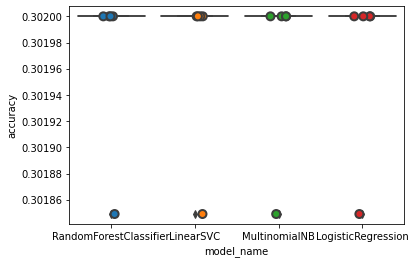

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
     MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

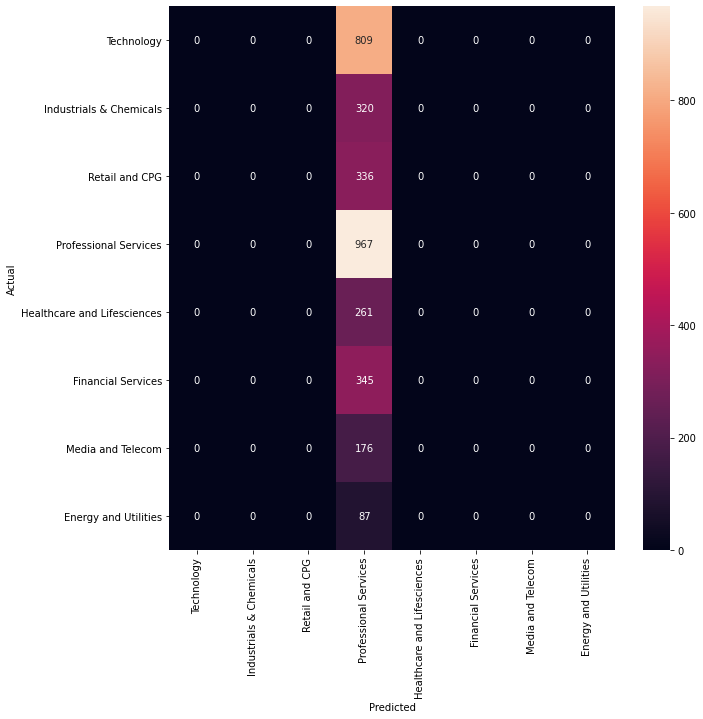

In [20]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.company_sector.values, yticklabels=category_id_df.company_sector.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [21]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['company_sector'].unique()))

                             precision    recall  f1-score   support

                 Technology       0.00      0.00      0.00       809
    Industrials & Chemicals       0.00      0.00      0.00       320
             Retail and CPG       0.00      0.00      0.00       336
      Professional Services       0.29      1.00      0.45       967
Healthcare and Lifesciences       0.00      0.00      0.00       261
         Financial Services       0.00      0.00      0.00       345
          Media and Telecom       0.00      0.00      0.00       176
       Energy and Utilities       0.00      0.00      0.00        87

                   accuracy                           0.29      3301
                  macro avg       0.04      0.12      0.06      3301
               weighted avg       0.09      0.29      0.13      3301



/home/slintel/bert/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/slintel/bert/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/slintel/bert/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
